In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from skimage import io
from skimage import transform, filters, color

In [3]:
def invert(img):
    """
    Inverts an grayscale image.
    """
    
    imgInvert = (255 - img)
    return imgInvert

In [4]:
def removeDoubleDetects(rectangles):
    """
    Removes all rectangles that are too simillar to be different cards.
    
    Compares the center positions of all the rectangles and removes
    the ones with distances are below a threshold.
    
    """
    
    # The threshold that is the minimum distance between
    DISTANCE_THRESHOLD = 50
    
    # The center positions of all the rectangles that have not been removed.
    centers = []
    
    # The array of rectangles that will be returned
    returnRectangles = []
    
    for rectangle in rectangles:
        # Get the center of the rectangle
        x, y, width, height = cv2.boundingRect(rectangle)
        center = np.array([x - width, y- height])
        
        # Indicates whether there is a rectangle that is too simillar.
        double = False
        
        # Check for all known centers, if the new one is too simillar.
        for cent in centers:
            dist = np.linalg.norm(center - cent)
            
            if(dist < DISTANCE_THRESHOLD):
                double = True
        
        # If the rectangle is not a double detection add its center to the array of
        # known centers and the rectangle to the array of rectangles that will be returned
        if(not double):
            centers.append(center)
            returnRectangles.append(rectangle)
            
    return returnRectangles

In [5]:
def isMagicCard(approx):
    """
    Decides whether an approximate contour is a MTG Card.
    
    Returns:
    -True, if the contour is a MTG Card
    -False, otherwise
    """
    
    
    area = cv2.contourArea(approx)
    
    if(area > 2000 and area < 15000 and len(approx) == 4):
        return True
    else:
        return False


In [6]:
def findAndDrawRectangles(img, imgDraw):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    rects = []

    for cnt in contours:
        approx = cv2.approxPolyDP(cnt,0.1*cv2.arcLength(cnt,True),True)
       
        if(isMagicCard(approx)):
            rects.append(approx)
    
    rects = removeDoubleDetects(rects)
    
    cv2.drawContours(imgDraw, rects, -1, (0,255,0), 3)
    
    #io.imshow(imgDraw)
    
    return rects, imgDraw
    

In [7]:
def loadAndPrepareImg(fileName):
    image = cv2.imread(os.getcwd() + "/" + fileName)
    image = image[0:846, 168:1209]
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return image

In [8]:
def getImageFromRectangle(img, rect):
    raise NotImplementedError
  


In [9]:
def getCardOrientation(cardBox):
    
    x, y, width, height = cardBox
    
    tapped = None
    
    if(width > height):
        tapped = False
    else:
        tapped = True
        
    side = None
    
    if(x < 423):
        side = "left"
    else:
        side = "right"
        
    
    if(tapped):
        return "bottom"
    else:
        if(side == "leftt"):
            return "right"
        else:
            return "left"
            
    


In [10]:
img = cv2.imread(os.getcwd() + "/screenshot7.png")
bg = cv2.imread(os.getcwd() + "/background.png")

img = img[0:846, 168:1209]

imgColor = img
imgColor2 = imgColor

kernel = np.ones((5,5),np.uint8)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(5,5),0)


#ret, thresh = cv2.threshold(img,90,255,cv2.THRESH_BINARY)
thresh = cv2.adaptiveThreshold(img, 255 ,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,41, 15)
#ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)



#thresh = cv2.Canny(thresh, 100, 200)
#thresh = invert(thresh)

#thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)


#thresh = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)
#thresh = cv2.dilate(thresh,kernel,iterations = 1)
#thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
#thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)


#thresholdImg = inverte(thresh)
#thresholdImg = cv2.morphologyEx(thresholdImg, cv2.MORPH_OPEN, kernel)

#ret,thresh = cv2.threshold(img,127,255,0)



#fig = plt.figure(figsize= (20,20)) #create an empty figure to plot into with 20x20 size
#io.imshow(thresh)
#io.imshow(imgColor)
#io.show()

#findAndDrawRectangles(thresh, imgColor)


#io.imshow(img)

In [11]:


def markCards(imgC):
    imgC = imgC[0:846, 168:1209]
    imgOriginal = imgC

    img2 = cv2.cvtColor(imgC, cv2.COLOR_BGR2GRAY)
    #img2 = cv2.GaussianBlur(img2,(5,5),0)


    average_color_row = np.average(img2, axis=0)
    average_color = np.average(average_color_row, axis=0)

    mask = img2 - average_color

    mask = np.abs(img2)

    mask = cv2.inRange(mask, 0,  75)

    #mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    #mask =  cv2.dilate(mask,kernel,iterations = 1)


    #mask = invert(mask)

    #fig = plt.figure(figsize= (20,20))
    #io.imshow(mask)

    rects, imgMarked = findAndDrawRectangles(mask, imgC)
    
    return rects
    """cv2.adaptiveThreshold(img2, 255 ,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,41, 15)


    fig = plt.figure(figsize= (20,20))
    io.imshow(mask)

    for rect in rects:

        box = cv2.boundingRect(rect)
        x, y, width, height = box
        cardImage = img2[y:y+height, x:x+width]

        cardThresh = thresh[y:y+height, x:x+width]

        cardImage = cv2.adaptiveThreshold(cardImage, 255 ,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,71, 15)
        #cardImage = cv2.Canny(cardImage, 100, 200)
        cardImage = cv2.morphologyEx(cardImage, cv2.MORPH_OPEN, kernel)


        fig = plt.figure(figsize= (20,20))
        #io.imshow(cardImage)"""

In [12]:
def rotateImage(img, degree):
        
    rows,cols = img.shape

    matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), degree, 1)
    return cv2.warpAffine(img, matrix, (cols, rows))


In [13]:
def getCardImages(sourceImage, rectangles):
    
    cardImages = []
    
    for rectangle in rectangles:
        
        box = cv2.boundingRect(rectangle)
        orientation = getCardOrientation(box)
        
        x, y, width, height = box
        cardImage = sourceImage[y:y+height, x:x+width]
        
         
        if(orientation == "right"):
            cardImage = rotateImage(cardImage, 90)
        elif(orientation == "left"):
            cardImage = rotateImage(cardImage, -90)
        elif(orientation == "bottom"):
            cardImage = rotateImage(cardImage, 180)
            
        
        cardImages.append(cardImage)
    
    return cardImages

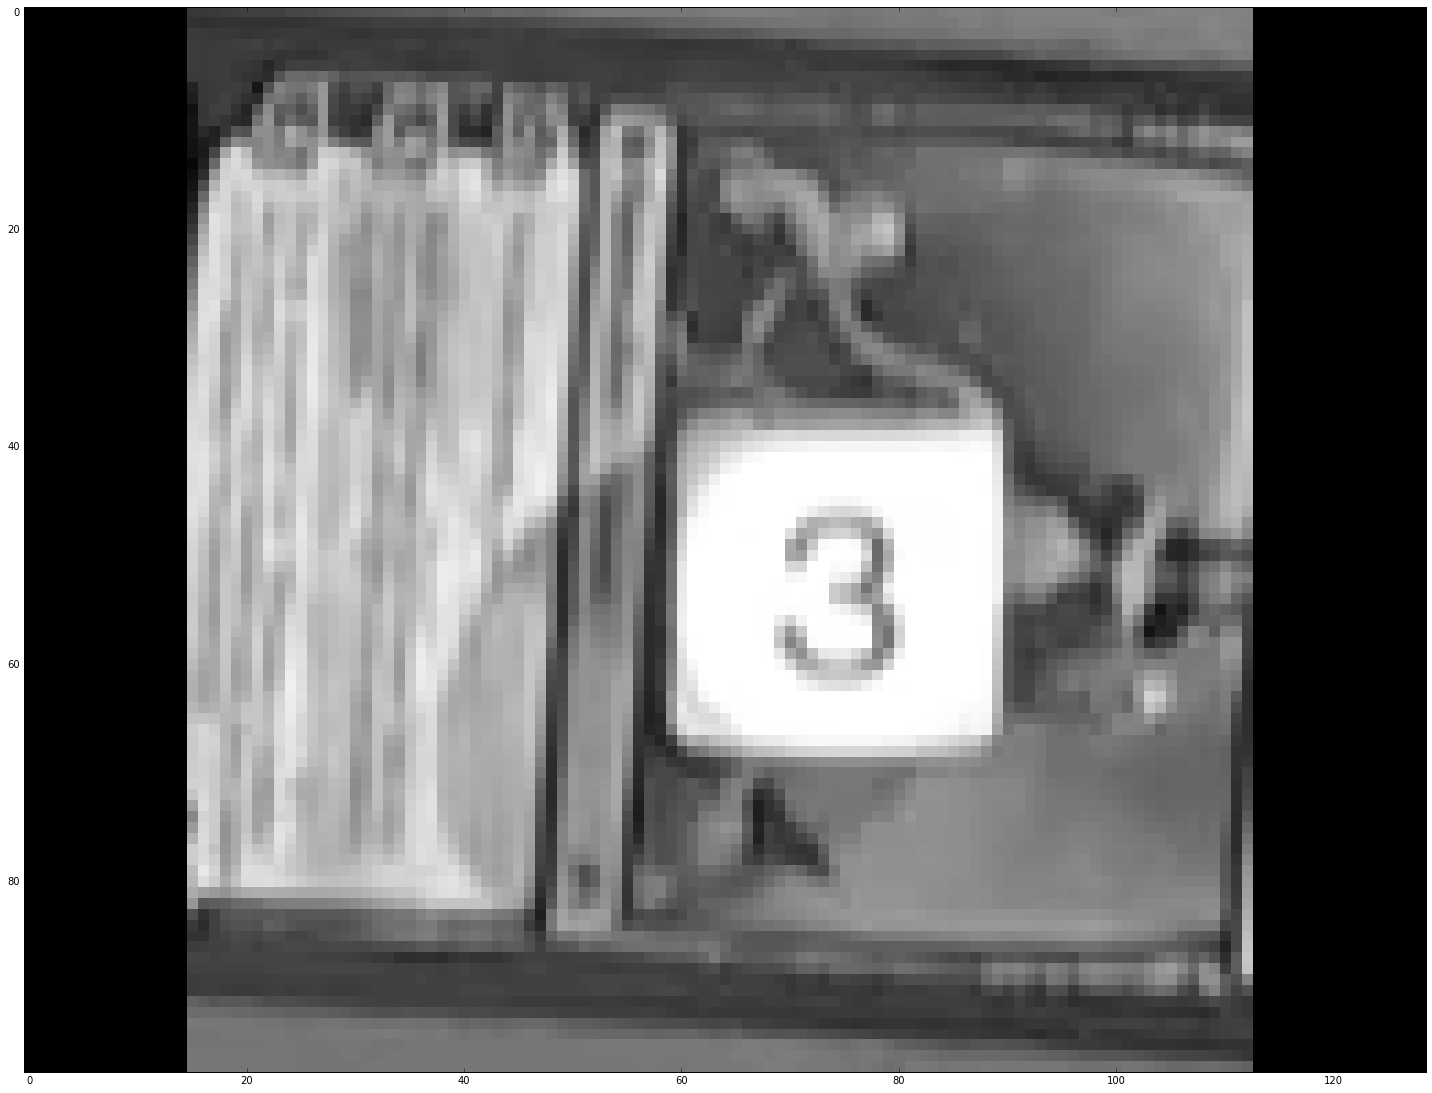

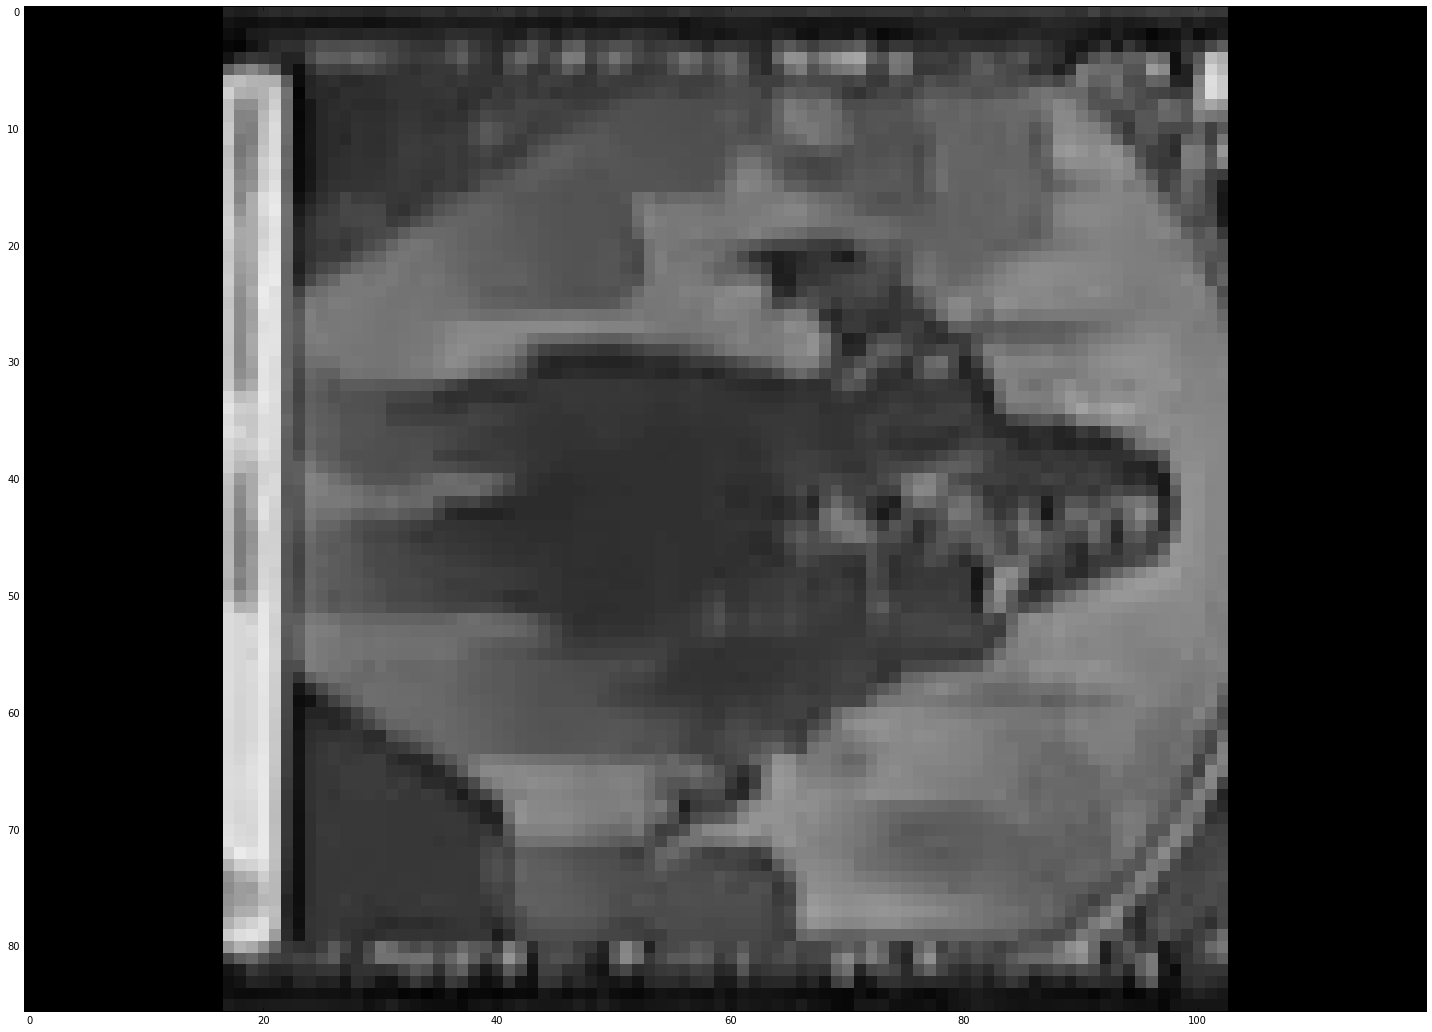

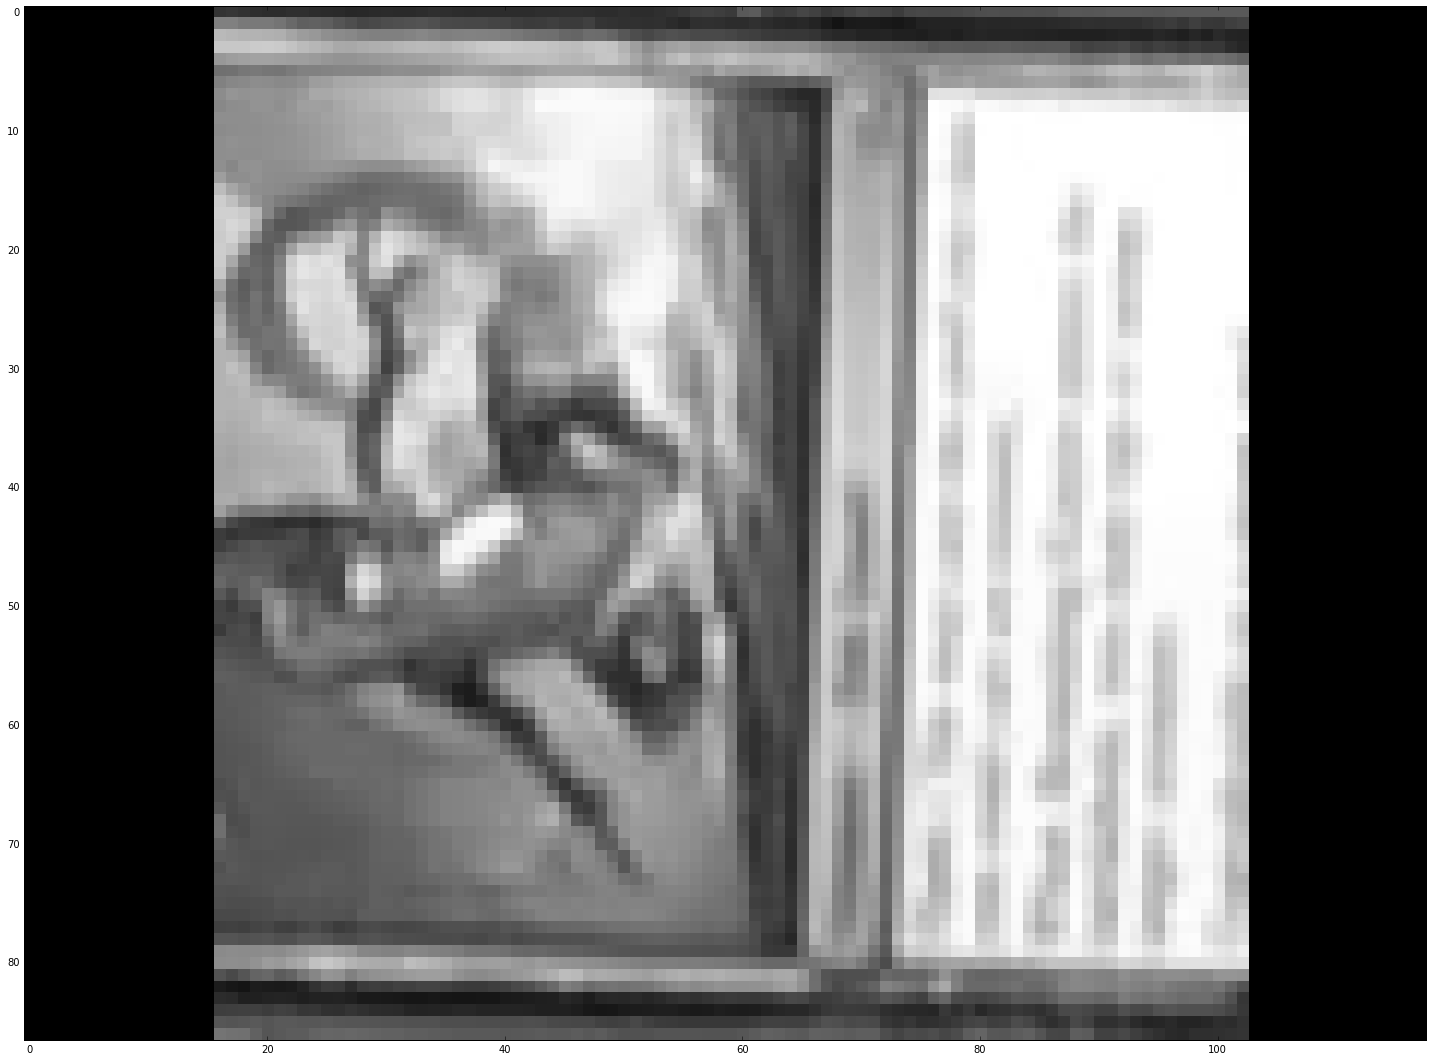

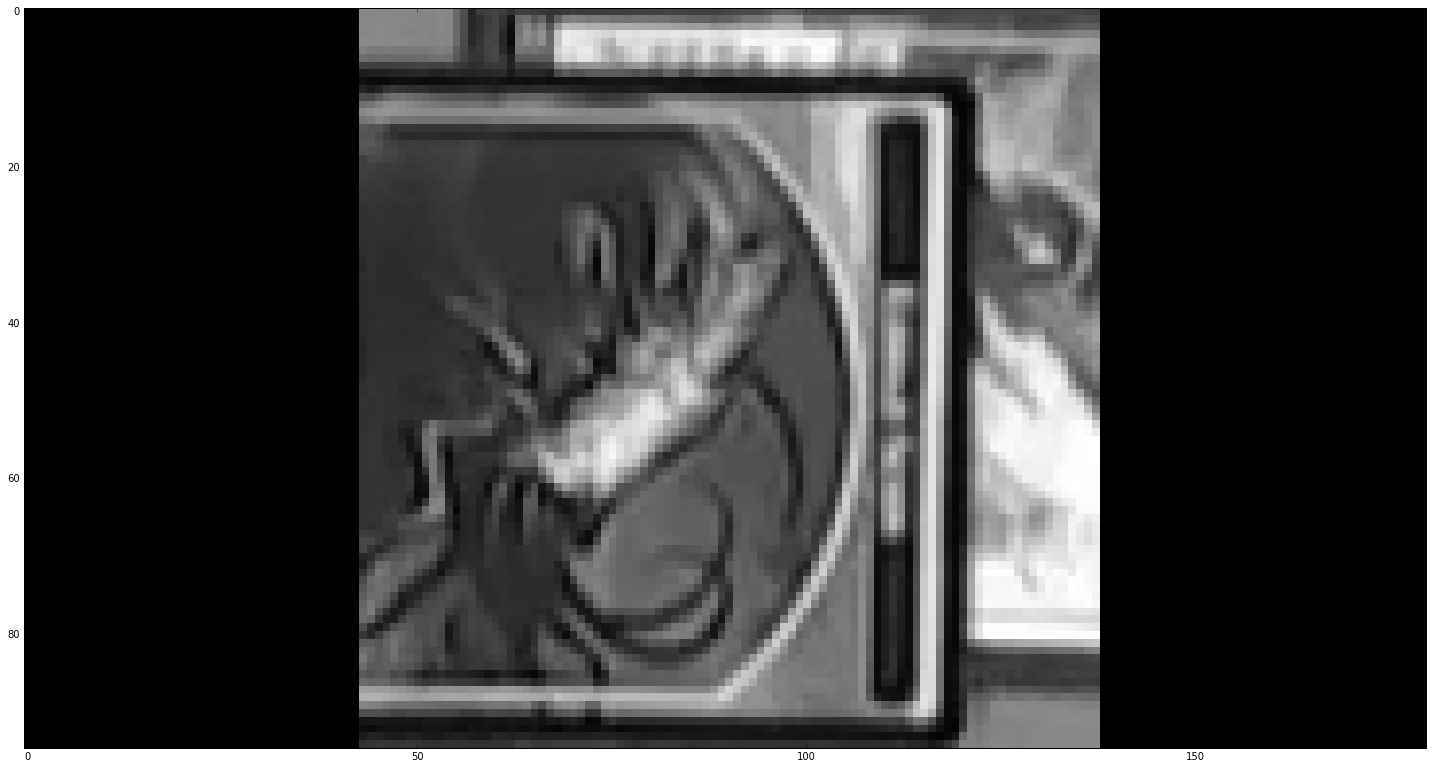

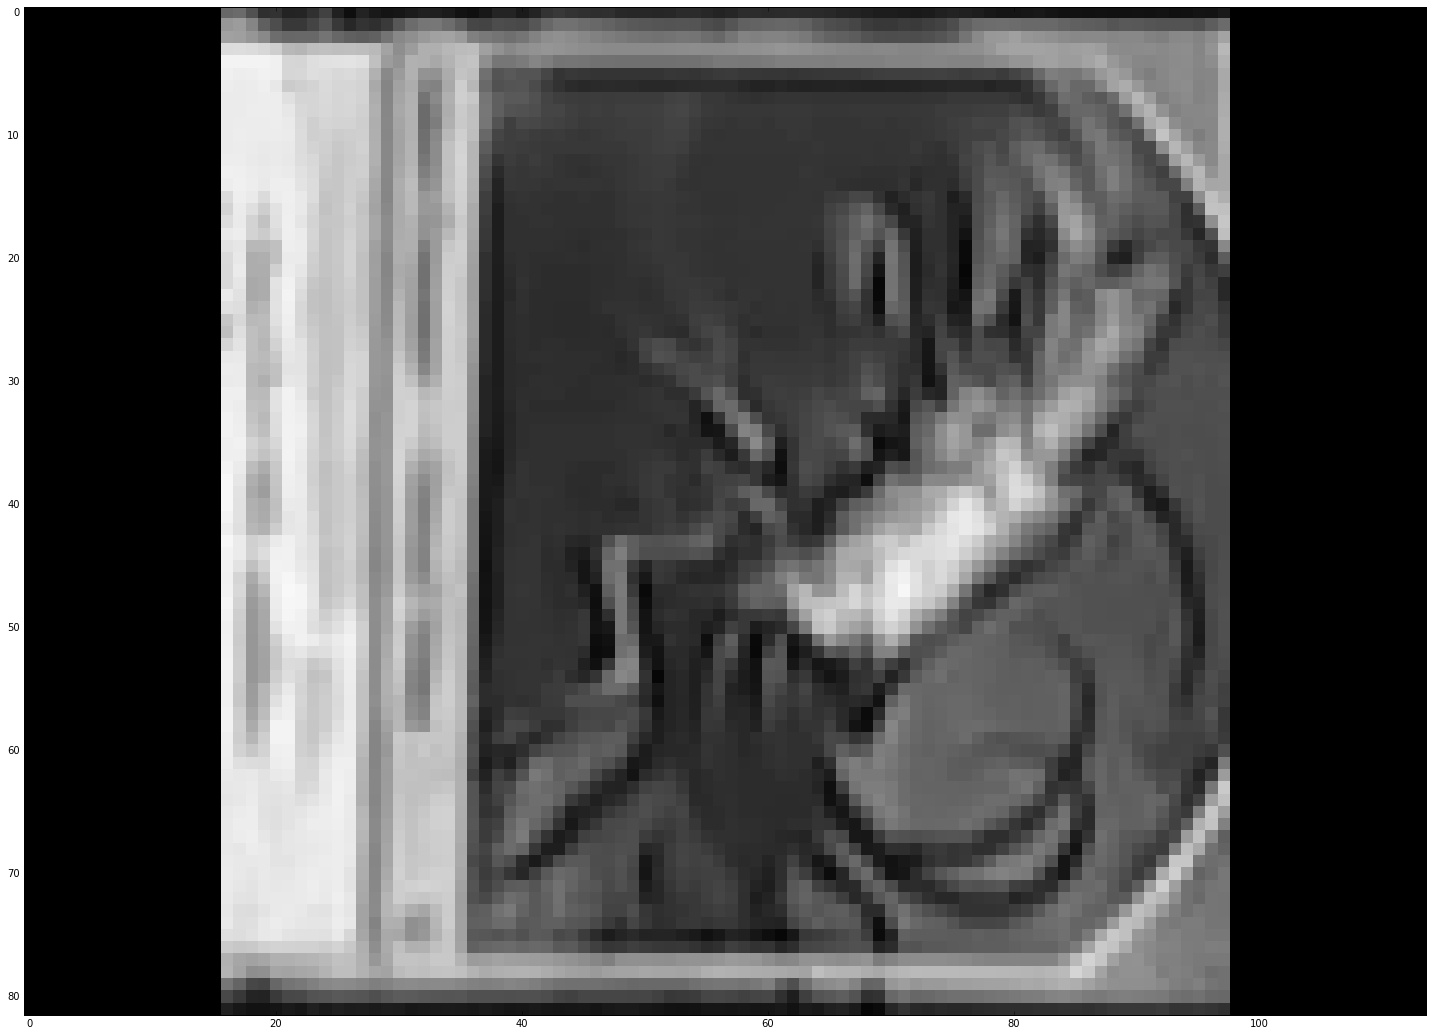

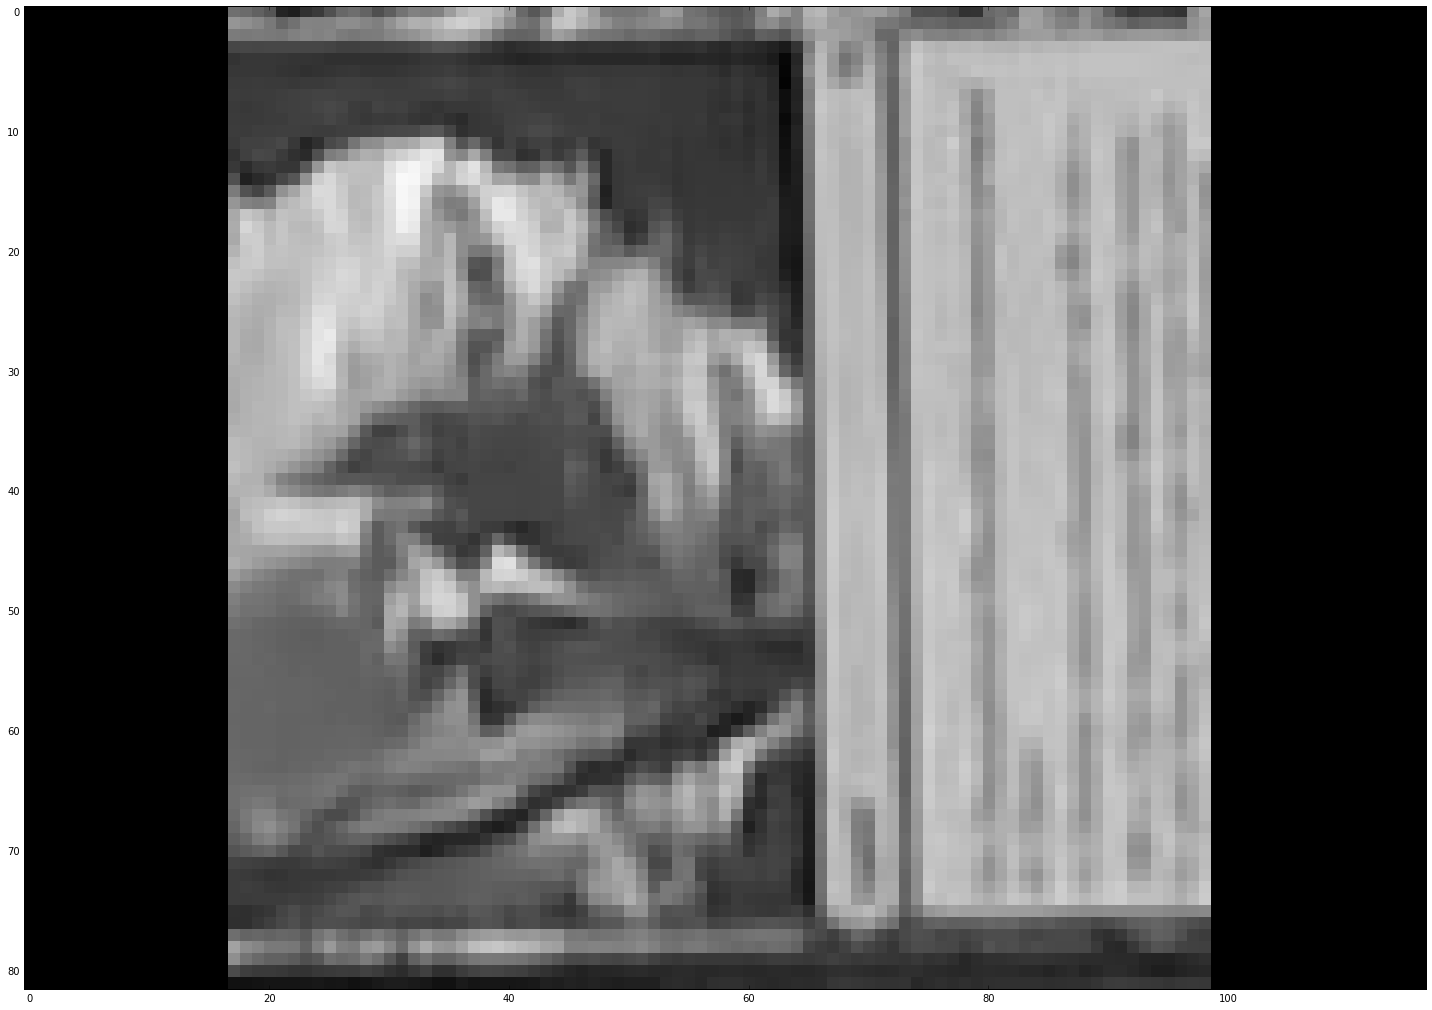

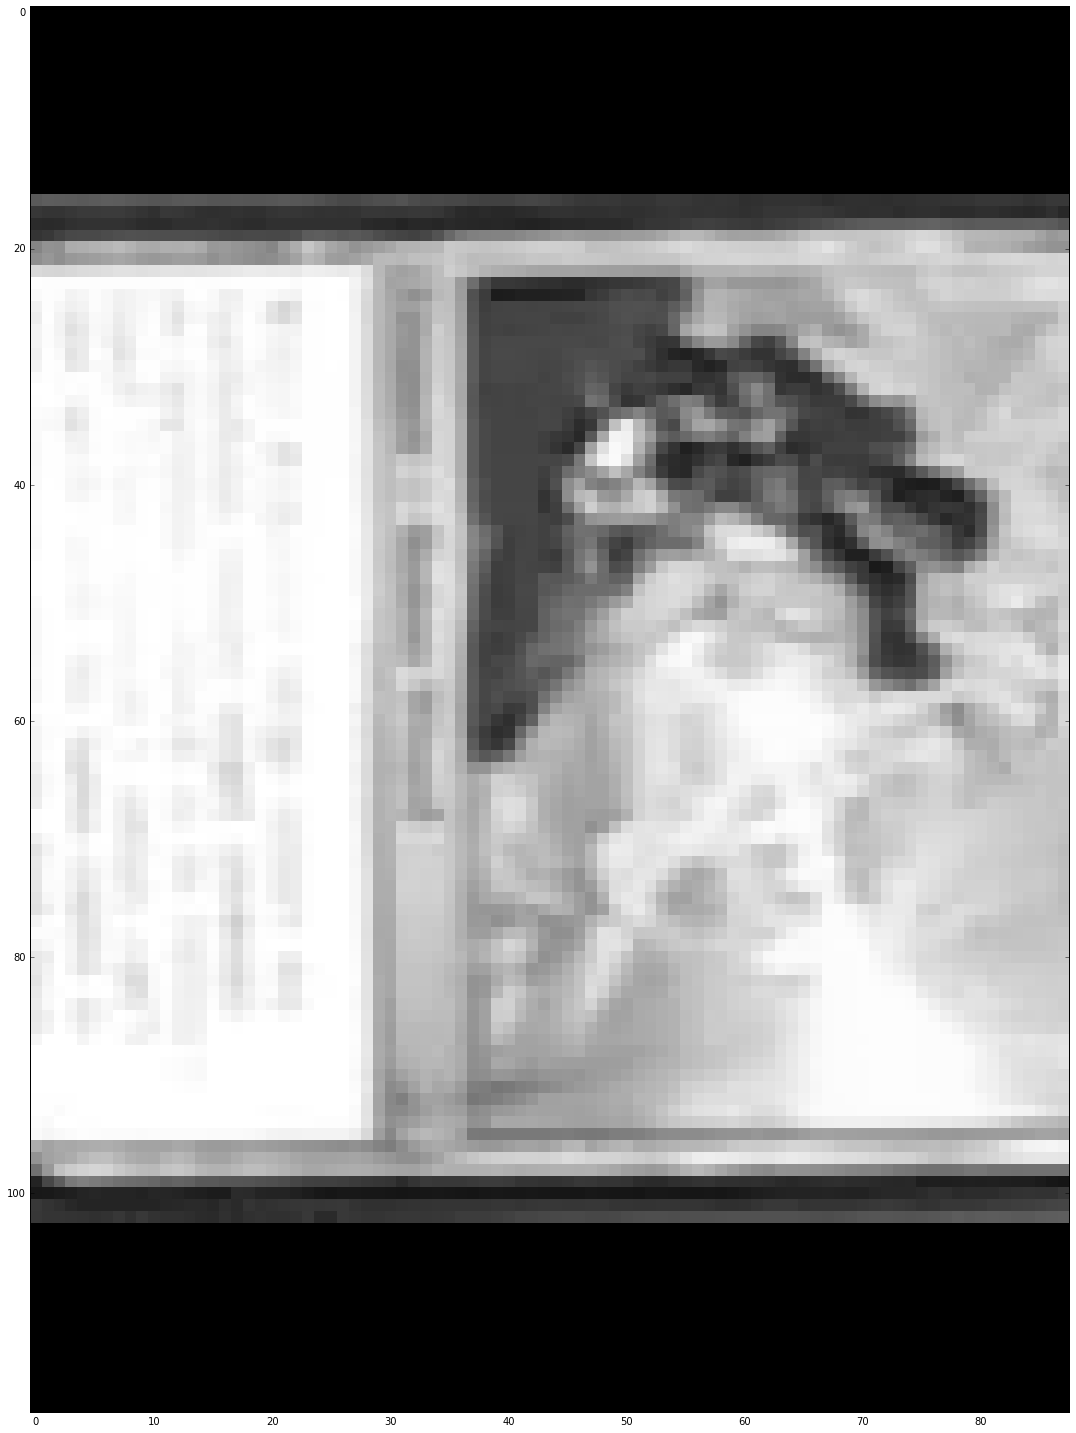

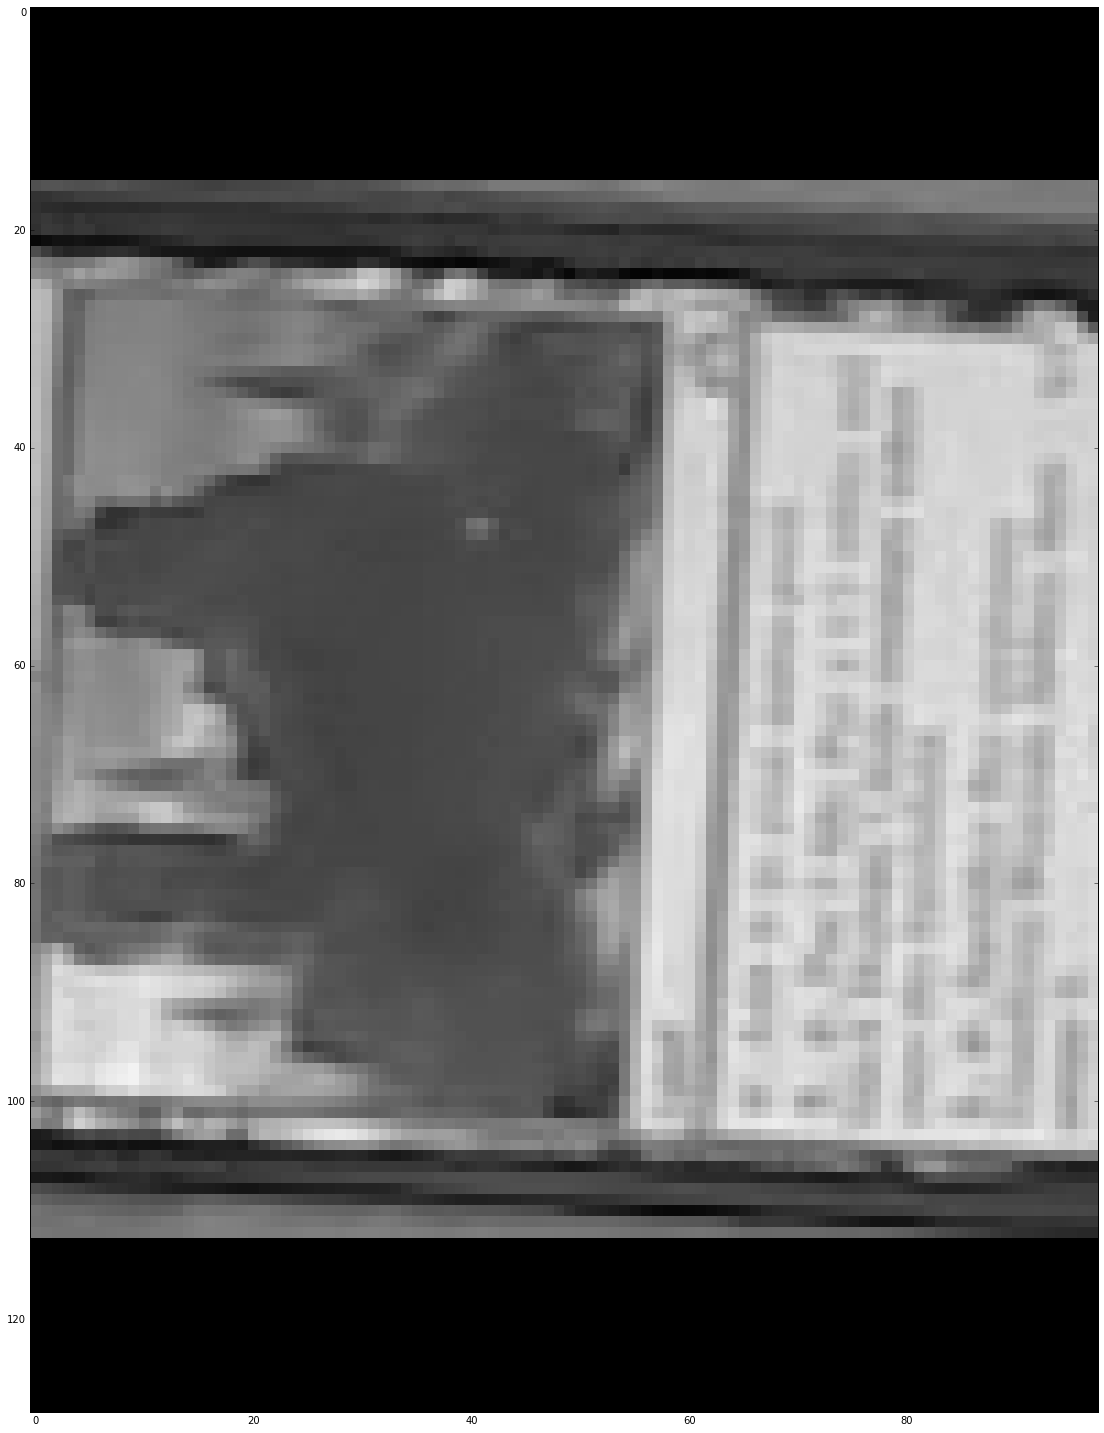

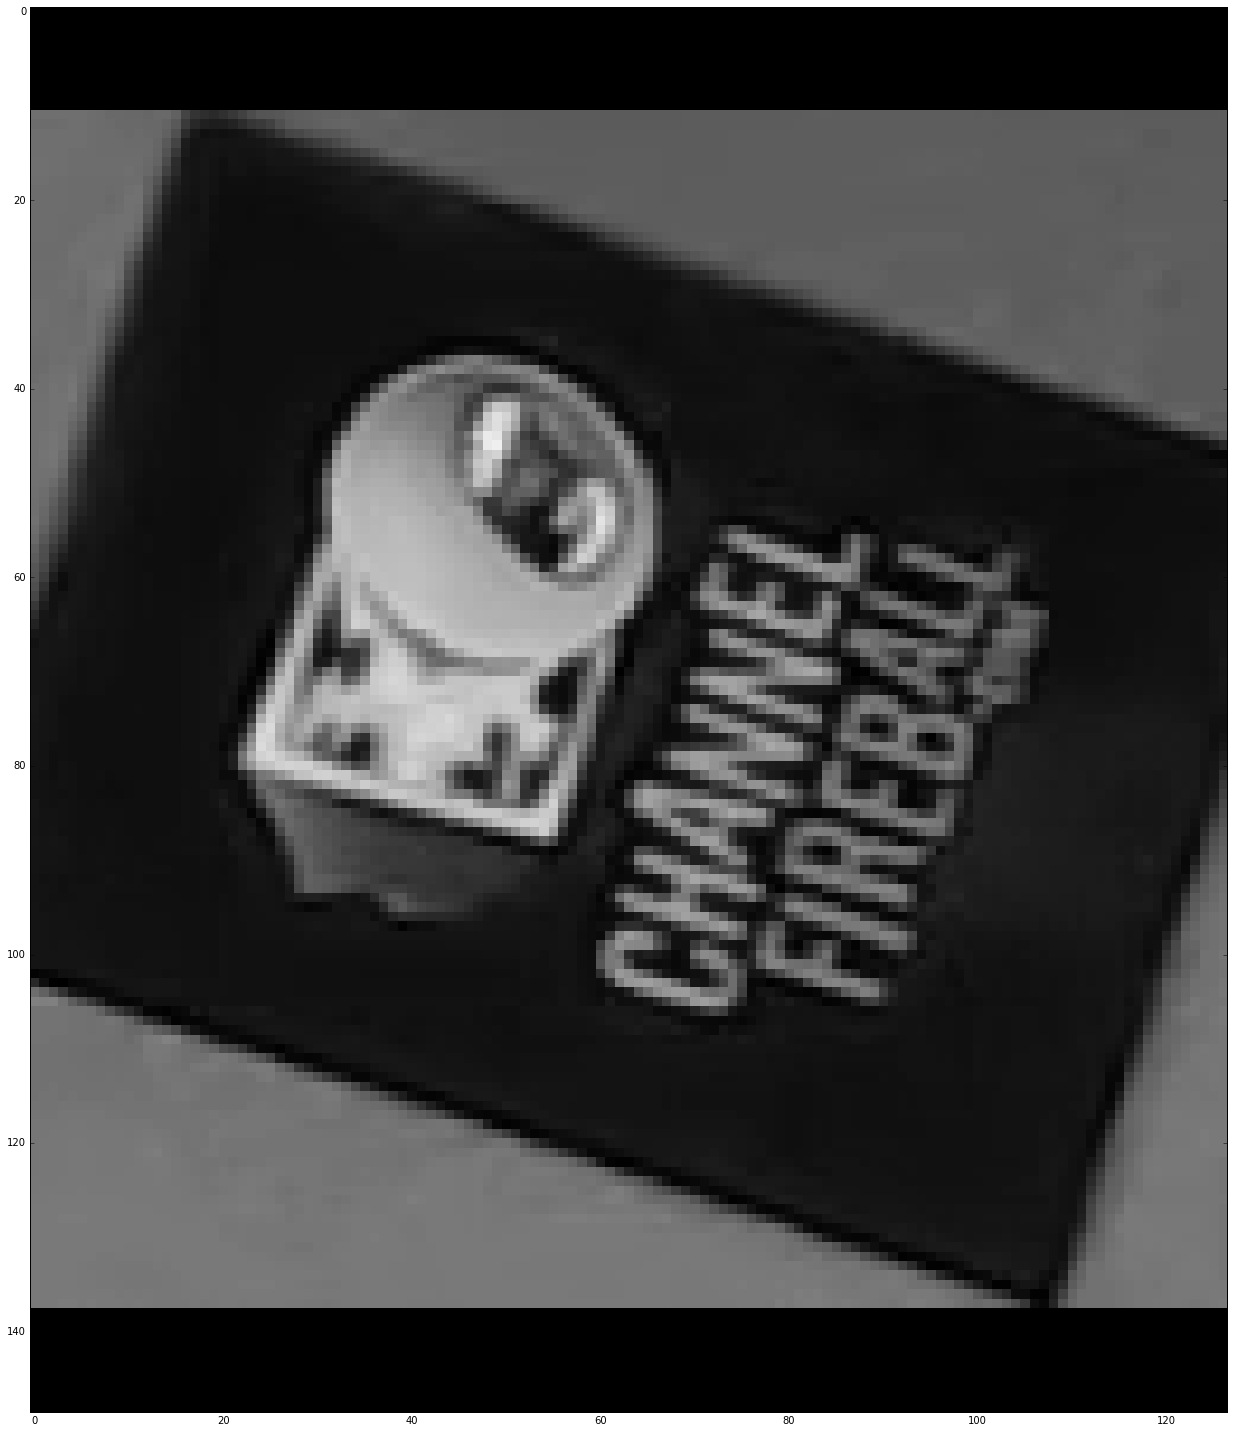

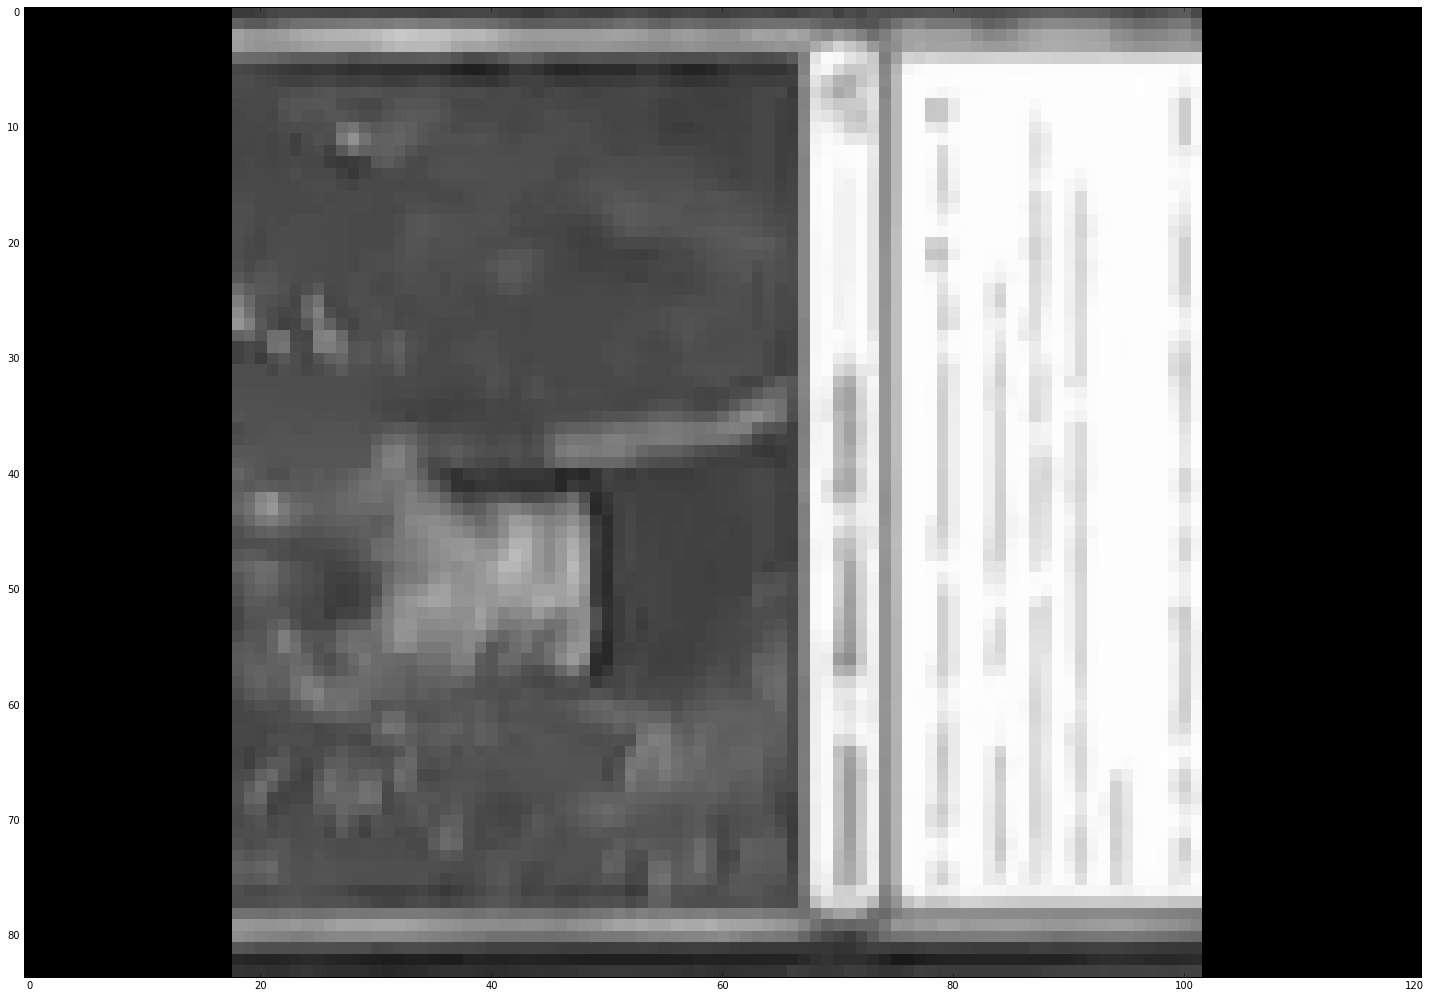

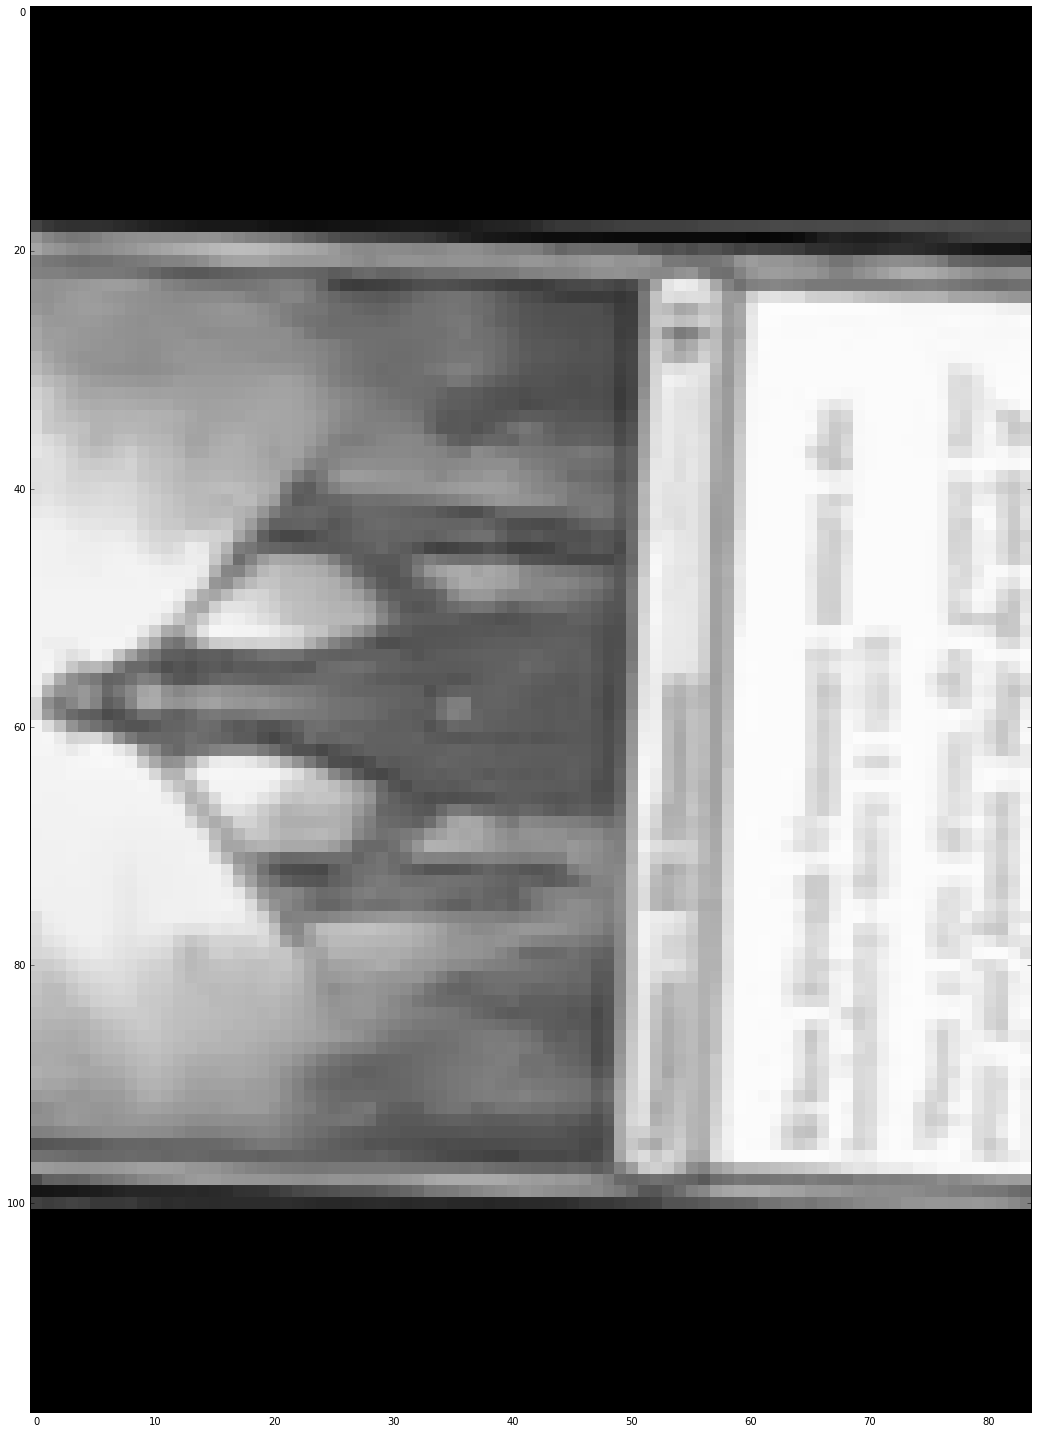

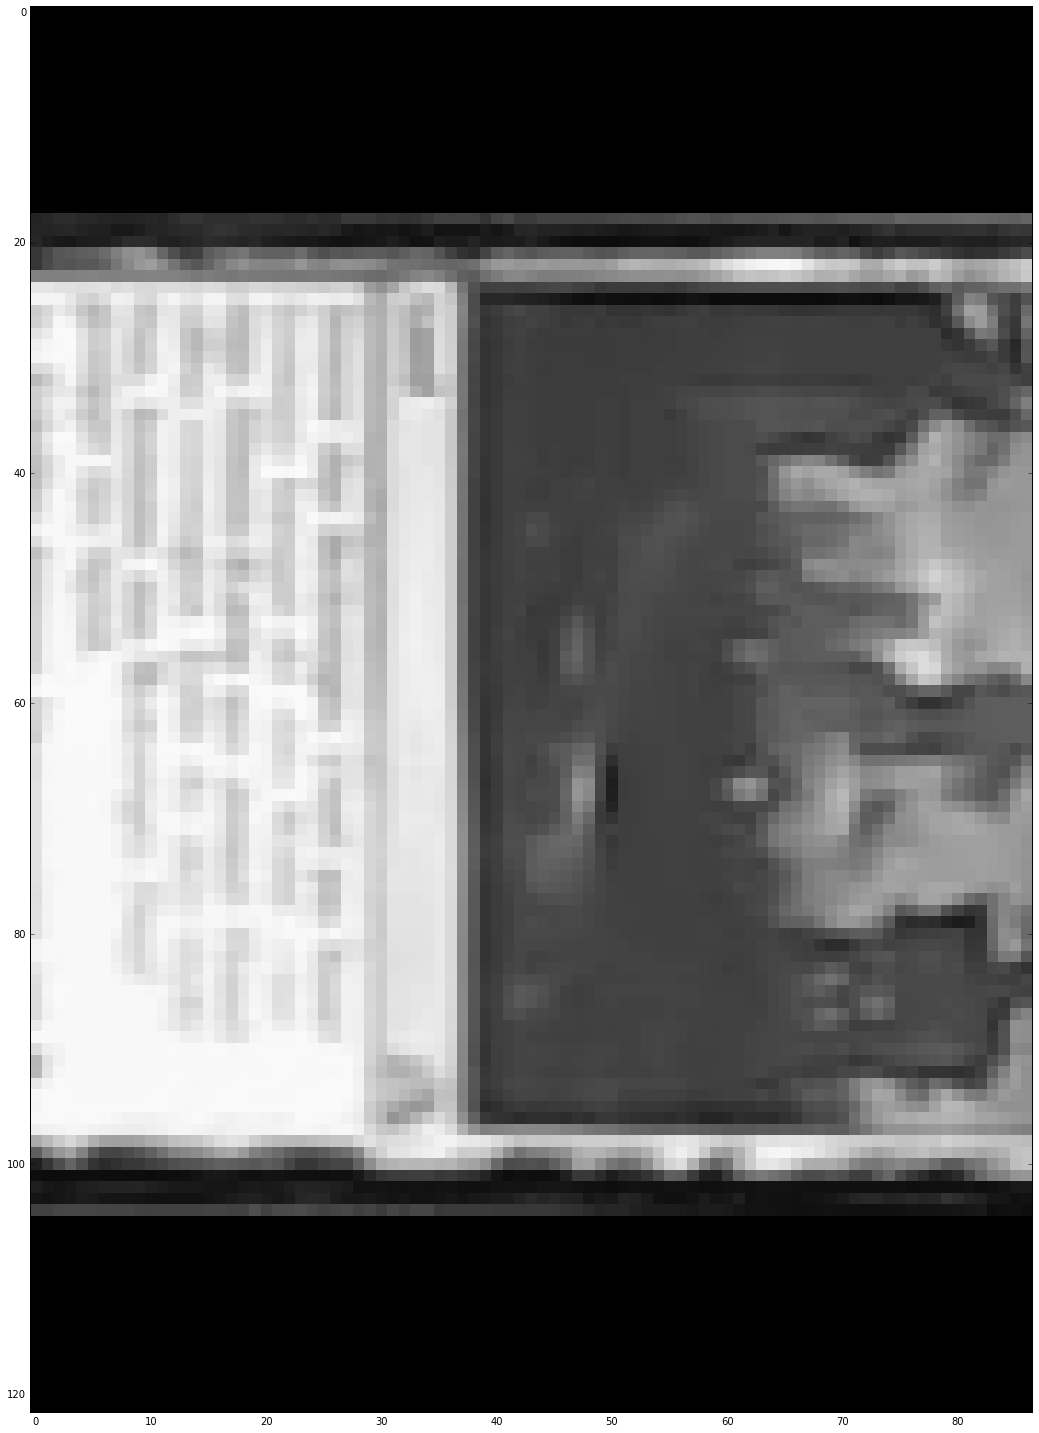

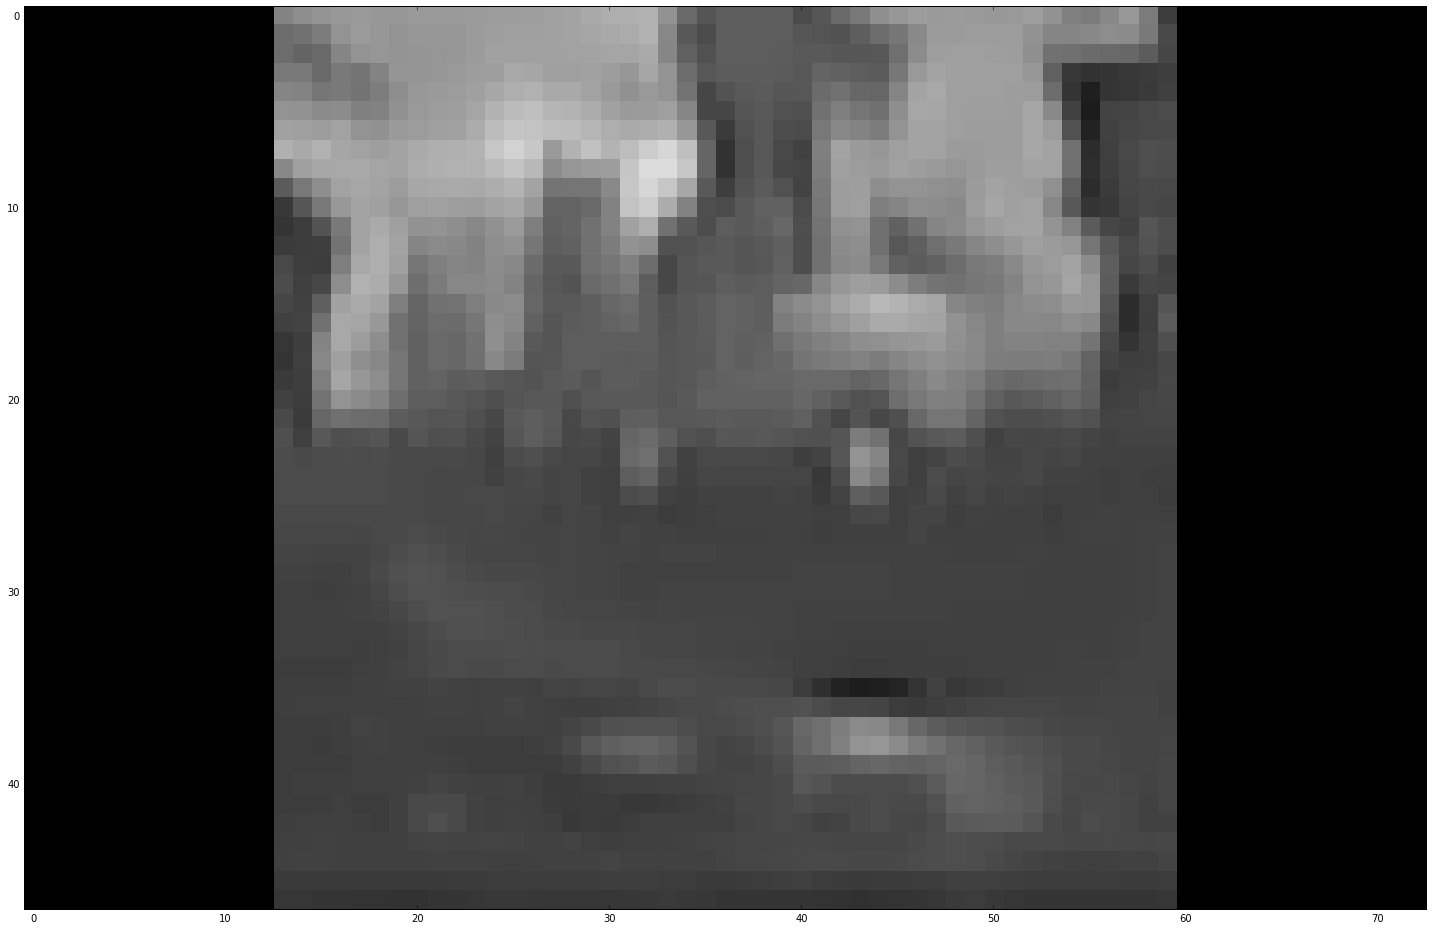

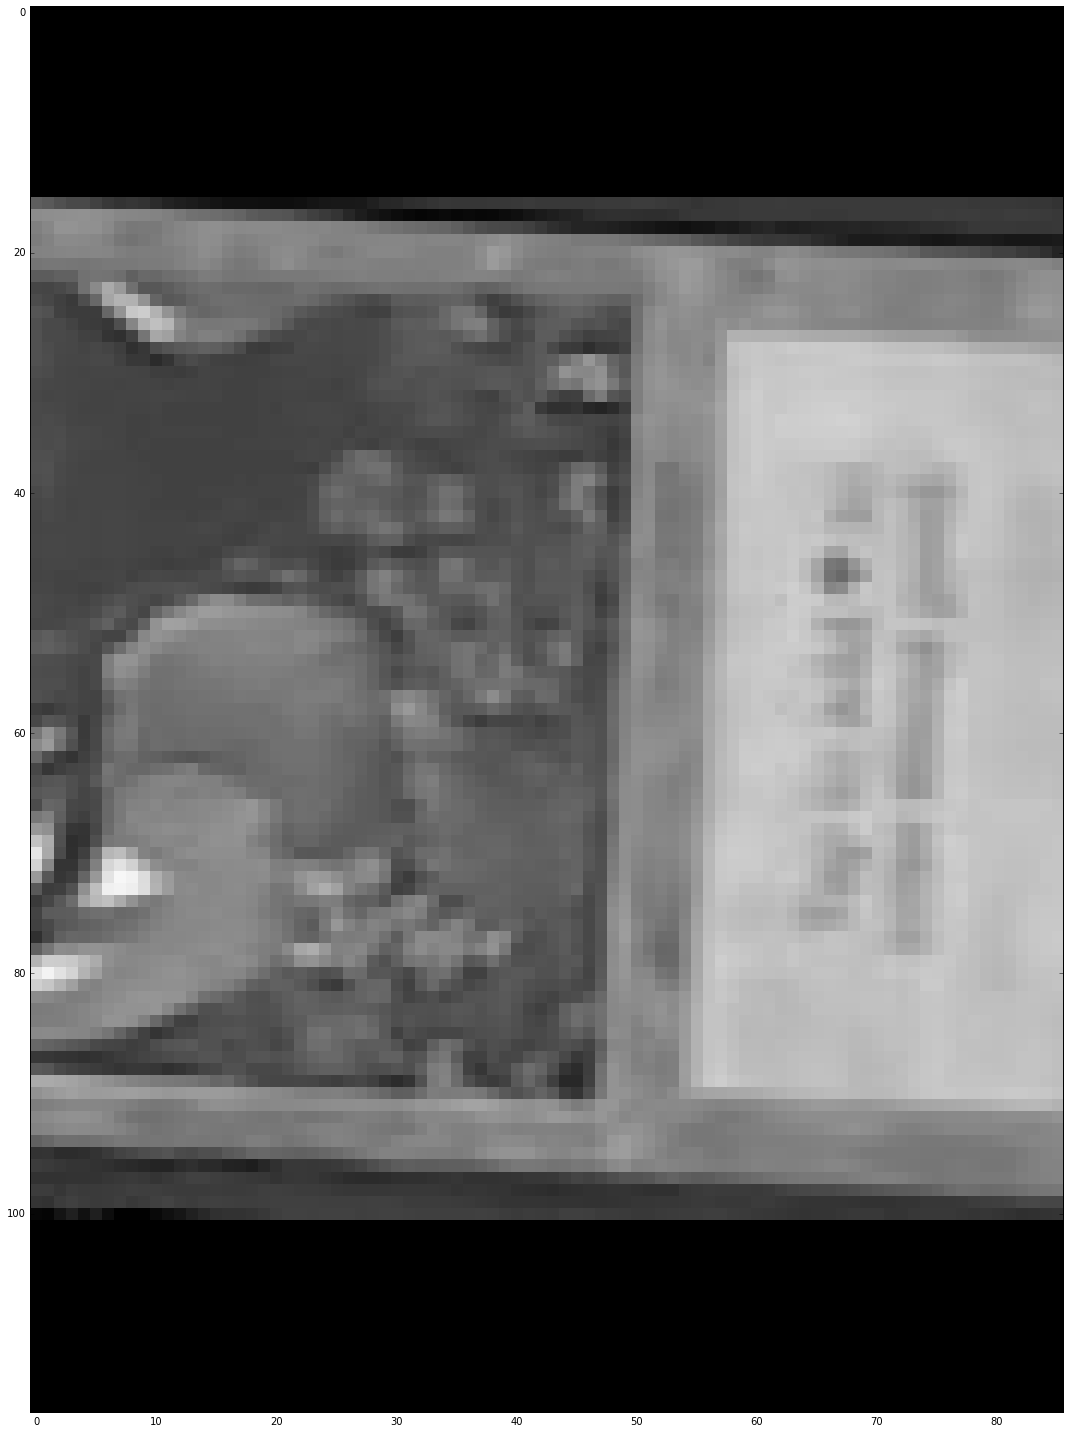

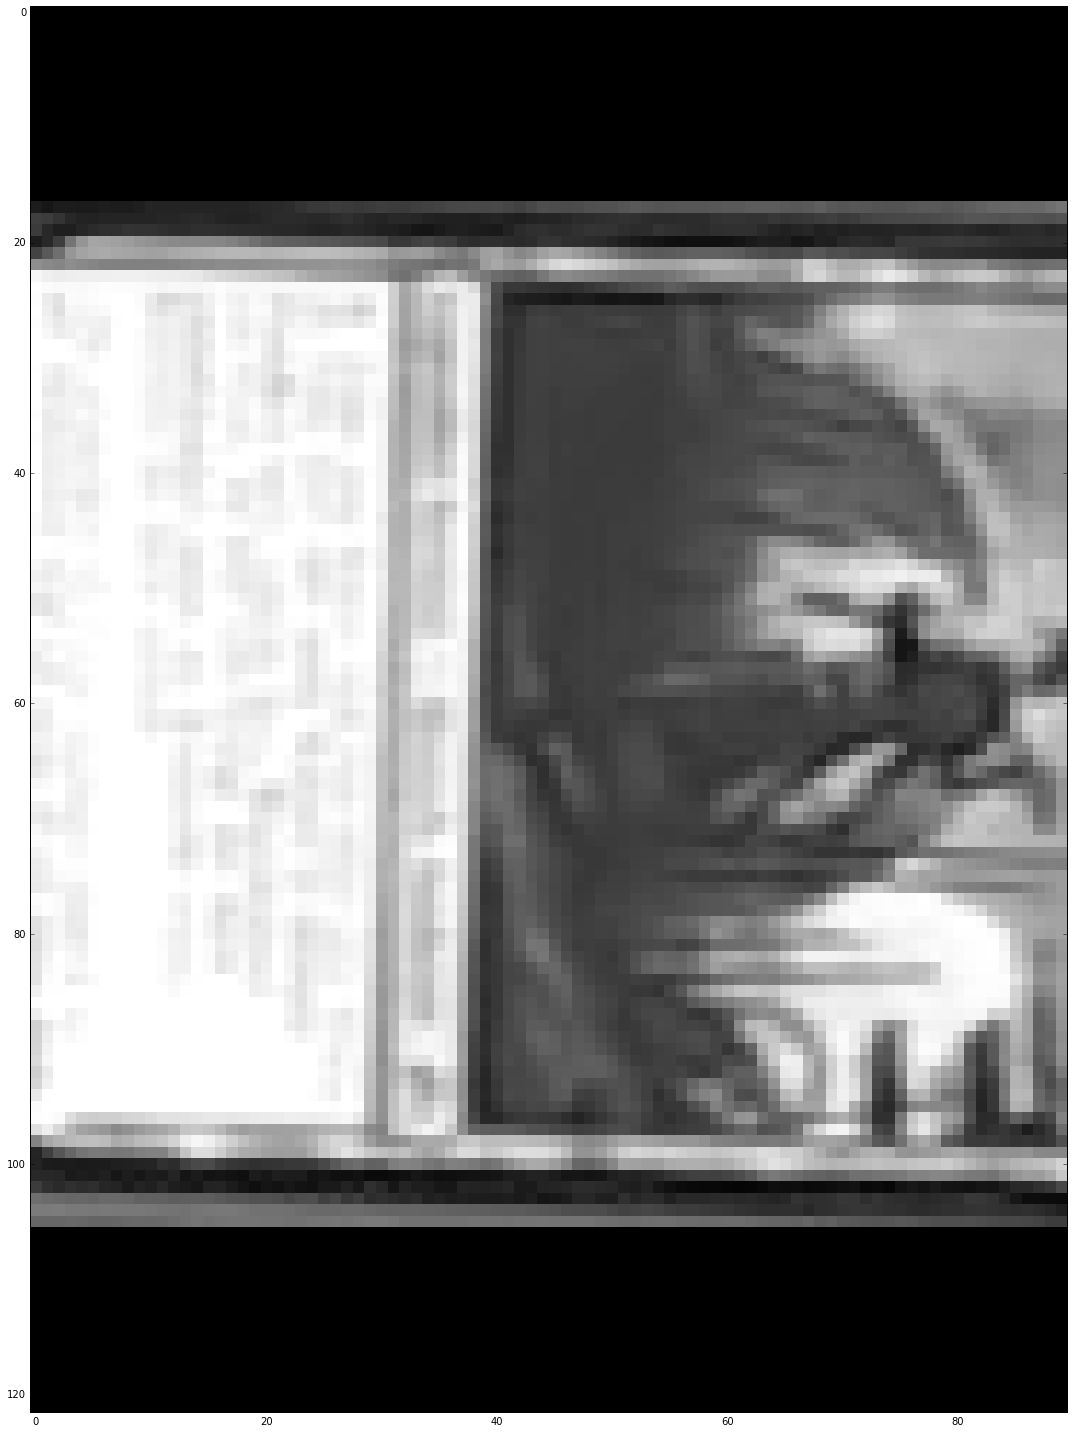

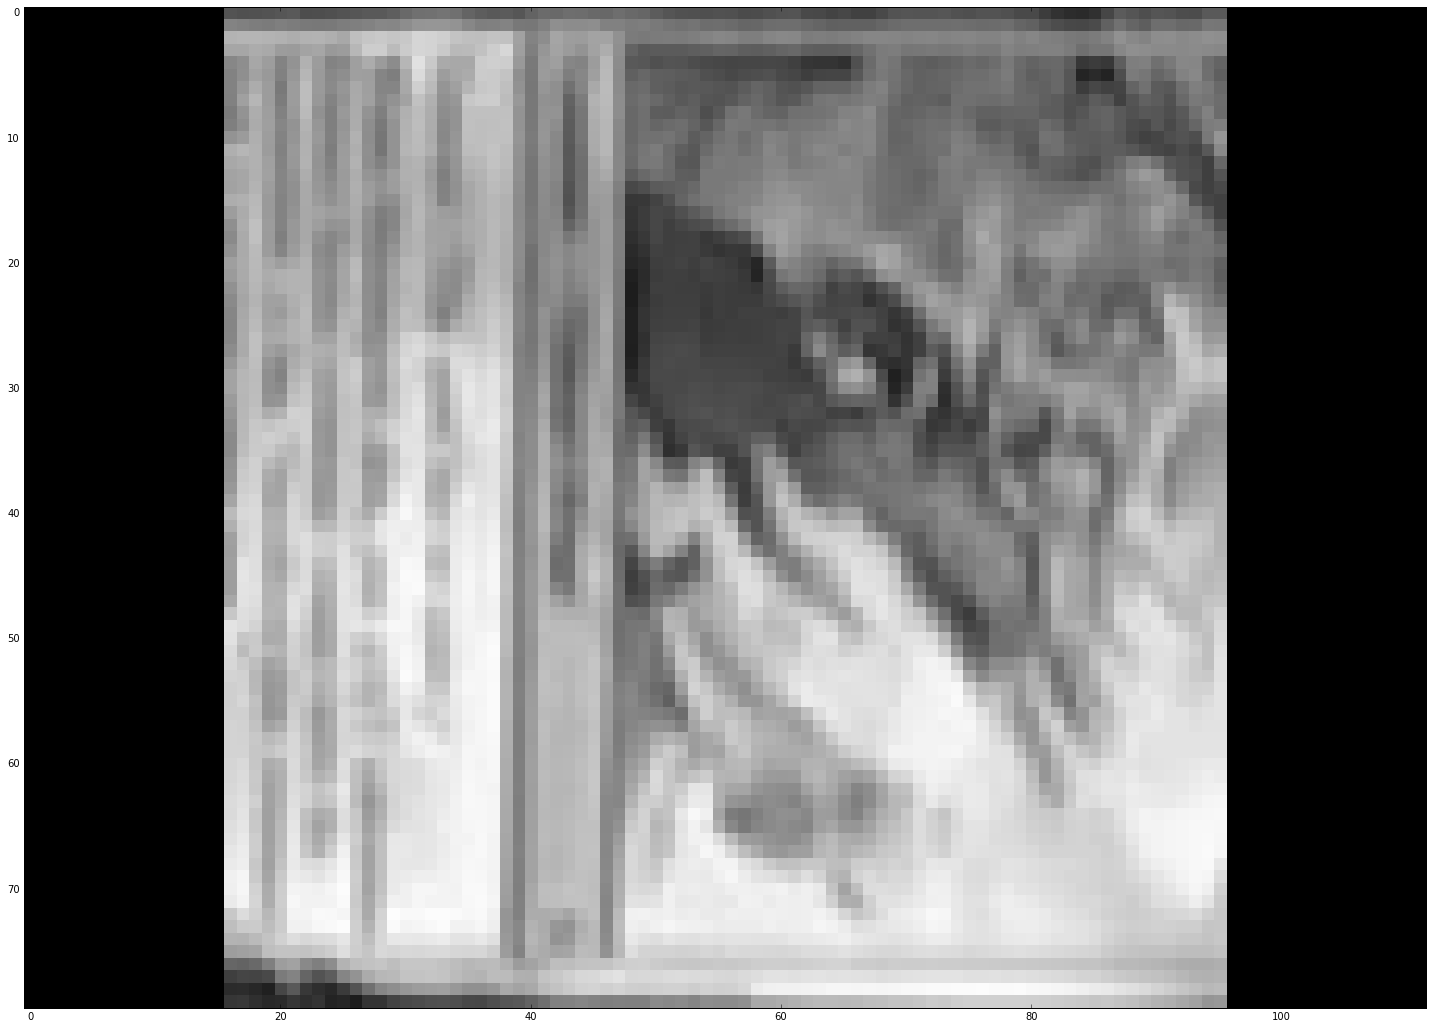

In [14]:
i = cv2.imread(os.getcwd() + "/screenshot4.png")

gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
gray = gray[0:846, 168:1209]

r = markCards(i)

cards = getCardImages(gray, r)

for card in cards:
    card = rotateImage(card, 90)
    fig = plt.figure(figsize= (20,20))
    io.imshow(card)


In [15]:
i = loadAndPrepareImg("screenshot5.png")

video = cv2.VideoCapture(os.getcwd() + "/data/video/output1.mp4")

while(True):
    # Capture frame-by-frame
    frame = video.grab()
    ret, frame = video.retrieve()
    
    lower = np.array([0, 0, 0])
    upper = np.array([90, 90, 90])

    frame = cv2.inRange(frame, lower, upper)

    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)


    
    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
video.release()
cv2.destroyAllWindows()


io.imshow(m)

NameError: name 'm' is not defined

In [ ]:
cv2.VideoWriter?